# Imports 0 (must run before any other code)

In [1]:
from spot_micro_stick_figure import SpotMicroLeg

import numpy as np
import matplotlib.pyplot as plt
from math import pi
from utilities import spot_micro_kinematics as smk
from utilities import transformations

# Constants (must run before any other code)

In [18]:
d2r = pi/180
r2d = 180/pi


# Instantiate spot micro stick figure obeject
ht_start = transformations.homog_transform(0,0,0,0,0,0)

# original dimensions
# l1 = 0.055
# l2 = 0.1075
# l3 = 0.13

# leg measure dimensions
l1 = 0.035
l2 = 0.150
l3 = 0.165

In [ ]:
sml = SpotMicroLeg(0,0,0,l1,l2,l3,ht_start,leg12=True)

# Try leg to a desired position
x = 0.01
y = 0.2
z = 0.01

(q1,q2,q3) = smk.ikine(x,y,z,l1,l2,l3,legs12 = True)

print('Leg angles')
print('q1: %2.1f deg, q2: %2.1f deg, q3: %2.1f deg'%(q1*r2d,q2*r2d,q3*r2d))

sml.set_angles(q1,q2,q3)

# Get leg coordinates
coords = sml.get_leg_points()

print('Right Back p4 coordinates:')
print('x4: %1.3f, y4: %1.3f, z4: %1.3f'%(coords[3][0],coords[3][1],coords[3][2]))

Leg angles
q1: 187.2 deg, q2: -51.8 deg, q3: 102.5 deg
Right Back p4 coordinates:
x4: 0.010, y4: 0.200, z4: 0.010


# Test coordinates setting

In [24]:
from spot_micro_stick_figure import SpotMicroStickFigure, SpotMicroLeg
from utilities import spot_micro_kinematics as smk
from utilities import transformations

import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
from math import pi

In [25]:
sml = SpotMicroLeg(0,0,0,l1,l2,l3,ht_start,leg12=True)

## Forward kinematics test

In [31]:
sml.set_angles(q1=0,q2=0,q3=0)
hip_pos, upper_pos, lower_pos, foot_pos = sml.get_leg_points()
print("hip_pos: ", hip_pos)
print("upper_pos: ", upper_pos)
print("lower_pos: ", lower_pos)
print("foot_pos: ", foot_pos)

hip_pos:  [0. 0. 0.]
upper_pos:  [-0.035  0.     0.   ]
lower_pos:  [-0.035 -0.15   0.   ]
foot_pos:  [-0.035 -0.315  0.   ]


## Inverse kinematics test

In [ ]:
def set_leg_position(x,y,z):
    """this function returns the coords
            Point 1: hip/body point
            Point 2: upper leg/hip joint
            Point 3: Knee, (upper/lower leg joint)
            Point 4: Foot, leg end
    """
    try:
        (q1,q2,q3) = smk.ikine(x,y,z,l1,l2,l3,legs12 = True)
        sml.set_angles(q1,q2,q3)
        coords = sml.get_leg_points()
        return coords
    except:
        return [0]*3,[0]*3,[0]*3,[0]*3


In [10]:
x = np.linspace(0,0.1,10)
y = np.linspace(0,0.1,10)
z = np.linspace(0,0,10)


x_leg, y_leg, z_leg = [],[],[]
for x,y,z in zip(x,y,z):
    commanded_pose = [x,y,z]
    hip_pos, upper_pos, lower_pos, foot_pos = set_leg_position(x,y,z)
    foot_pos = np.round(foot_pos,4)
    x_leg.append([foot_pos[0]])
    y_leg.append([foot_pos[1]])
    z_leg.append([foot_pos[2]])
    print(foot_pos)
    # print(np.array(foot_pos)-np.array(commanded_pose))

[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[ 0.0444  0.0444 -0.    ]
[0.0556 0.0556 0.    ]
[ 0.0667  0.0667 -0.    ]
[0.0778 0.0778 0.    ]
[ 0.0889  0.0889 -0.    ]
[0.1 0.1 0. ]


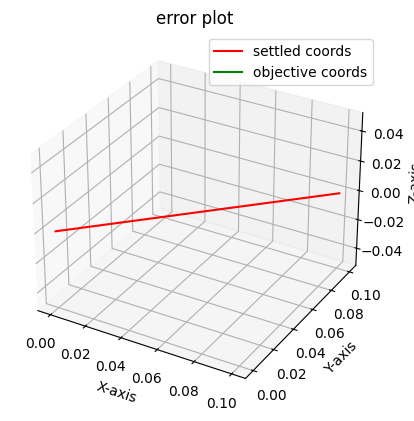

In [11]:
# Create a figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# Draw the line
ax.plot(x_leg, y_leg, z_leg, label='settled coords', color='red')
ax.plot(x, y, z, label='objective coords', color='green')


# Add labels
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('error plot')
ax.legend()

# Show the plot
plt.show()

# test body coordinate setting plottings

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from utilities import transformations
from math import pi
from spot_micro_stick_figure import SpotMicroStickFigure

d2r = pi/180
r2d = 180/pi

In [33]:
def arch(samples=100):
    # Parameters for the arch
    radius = 0.1         # Radius of the arch
    height = 0         # Maximum height of the arch
    theta_start = 0    # Starting angle in radians
    theta_end = np.pi  # Ending angle in radians (semi-circle)

    # Generate the theta values for the arch
    theta = np.linspace(theta_start, theta_end, samples)

    # Convert polar coordinates to Cartesian coordinates on the x-y plane
    x = radius * np.cos(theta)[::-1]
    z = radius * np.sin(theta)[::-1]

    # Define z values for the arch
    y = height * np.sin(theta)[::-1]
    return x,y,z

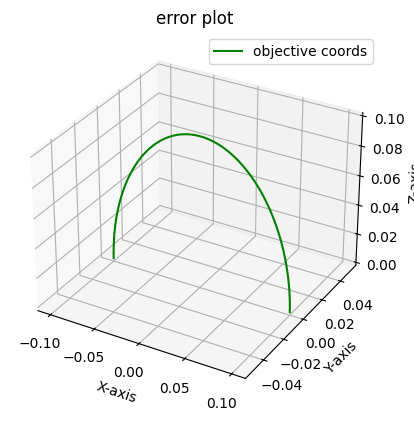

In [34]:
# Create a figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x,y,z = arch(samples=100)

# Draw the line
ax.plot(x, y, z, label='objective coords', color='green')


# Add labels
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('error plot')
ax.legend()

# Show the plot
plt.show()

/var/folders/s4/bm5cfwp97214173jb5bgzcm40000gn/T/ipykernel_78652/3194067574.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


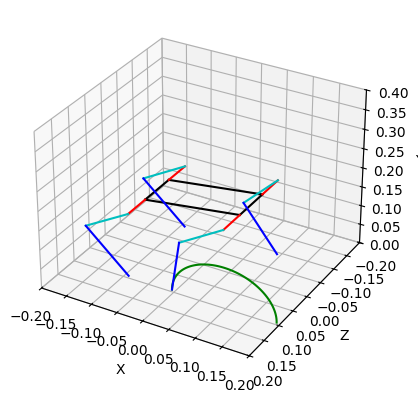

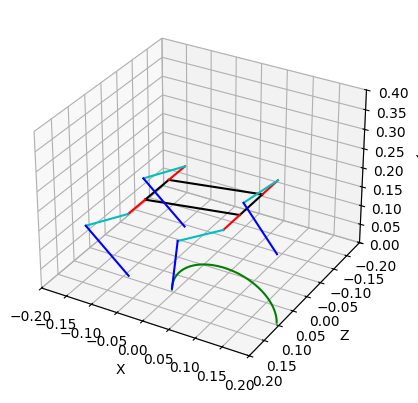

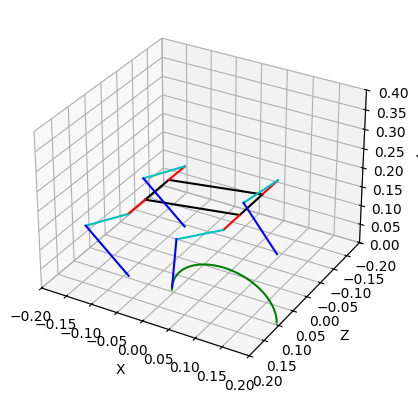

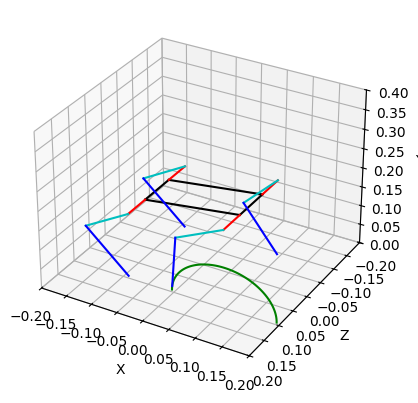

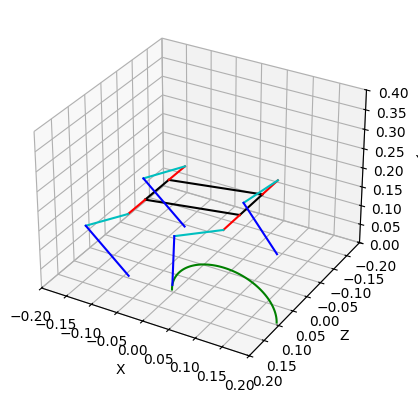

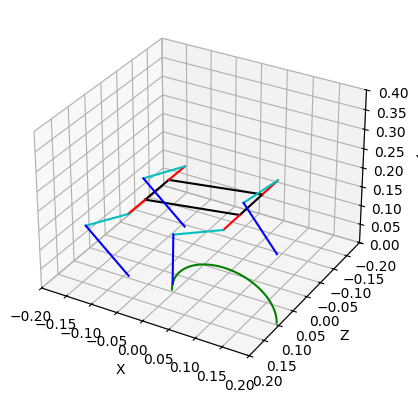

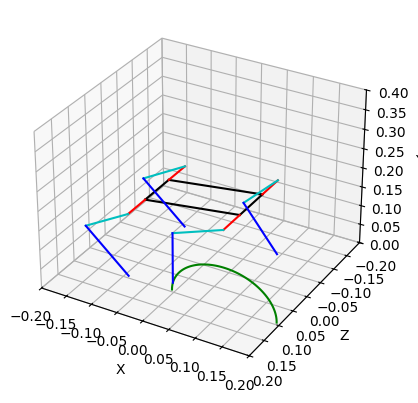

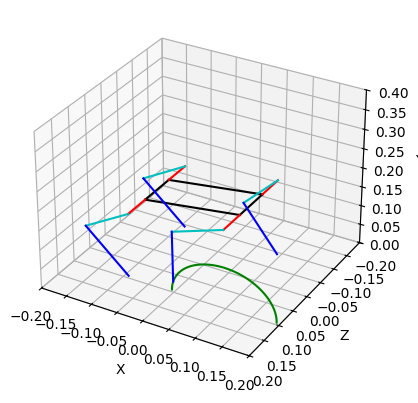

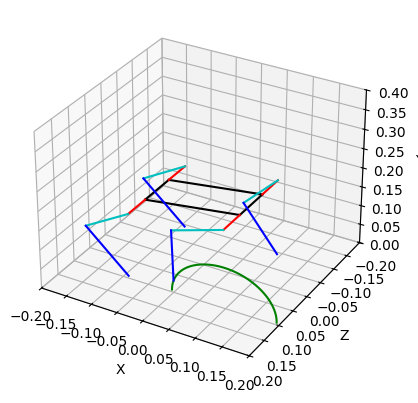

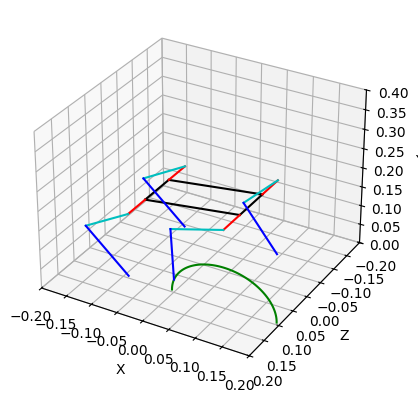

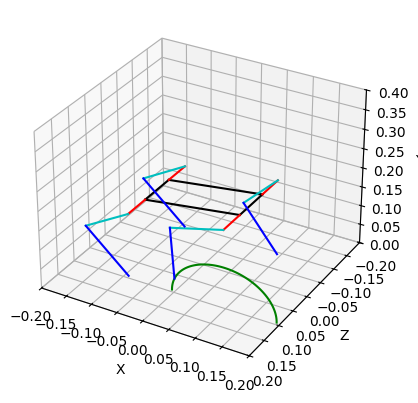

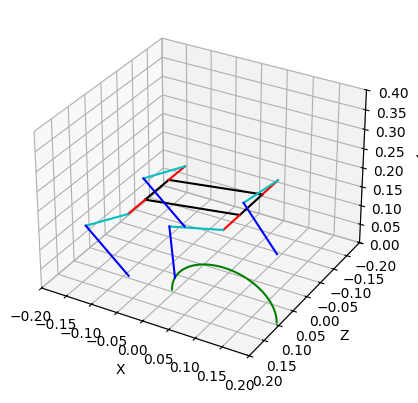

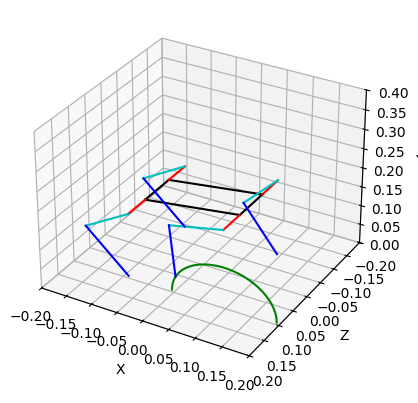

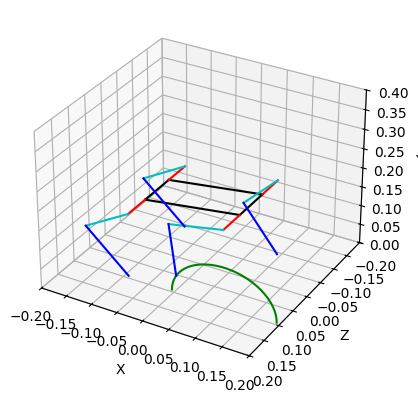

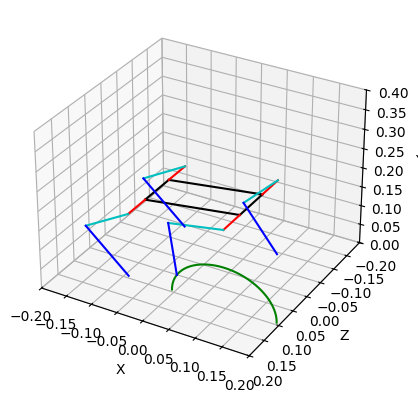

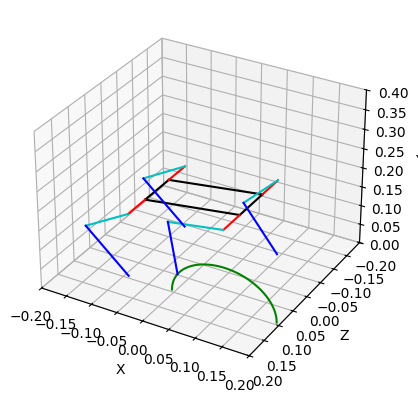

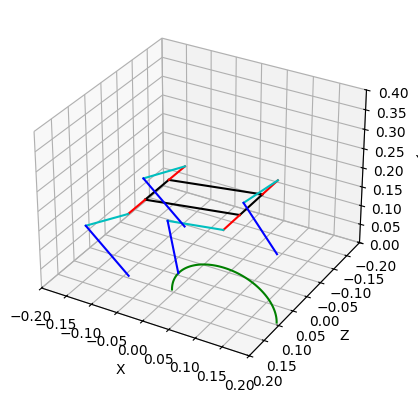

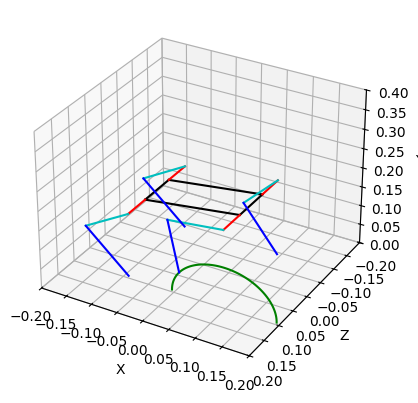

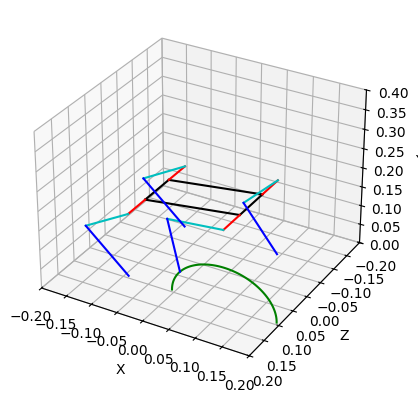

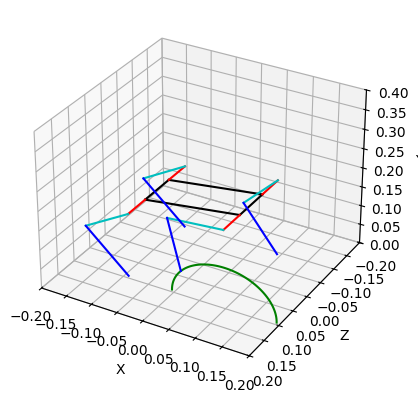

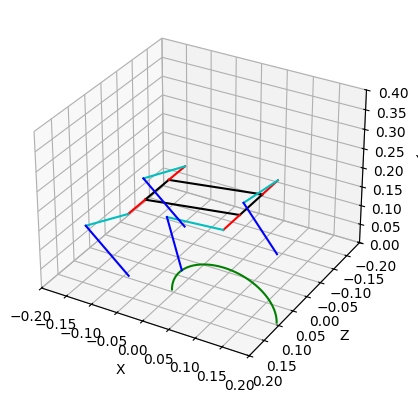

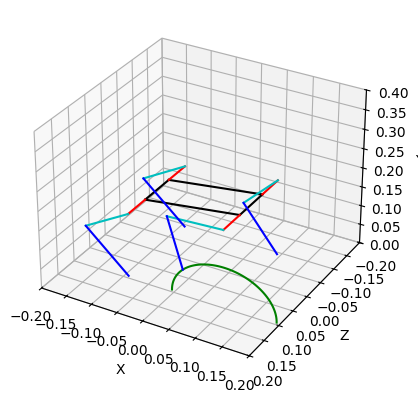

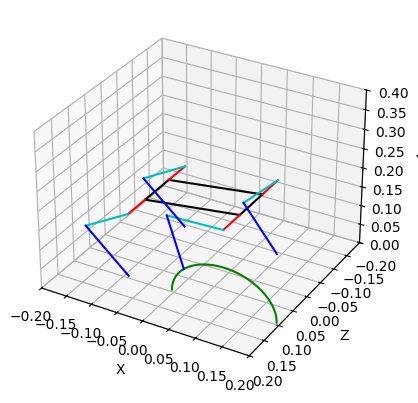

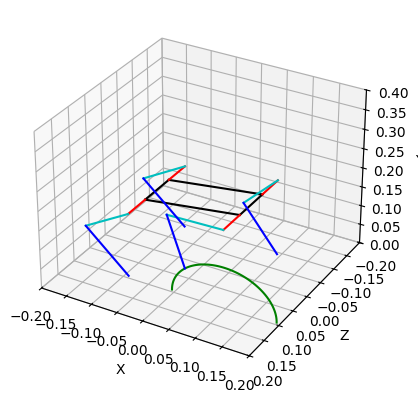

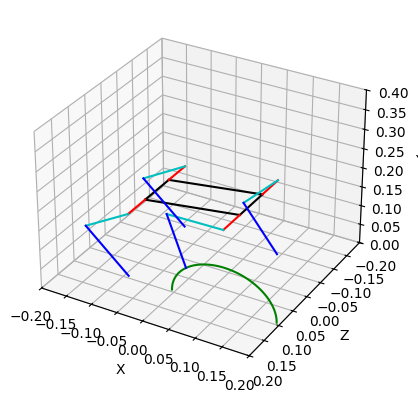

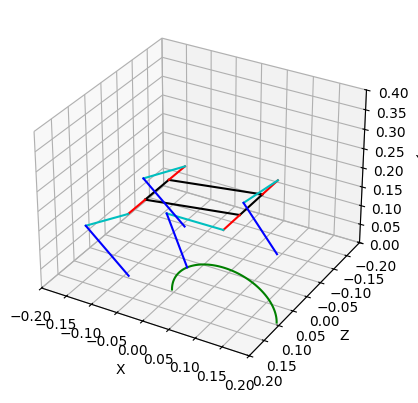

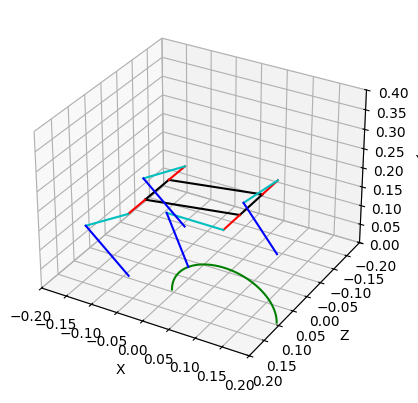

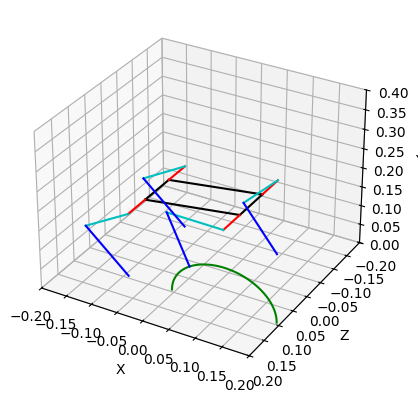

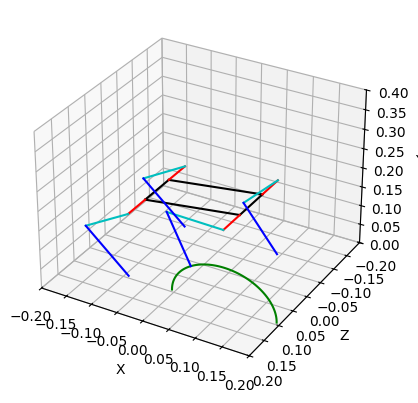

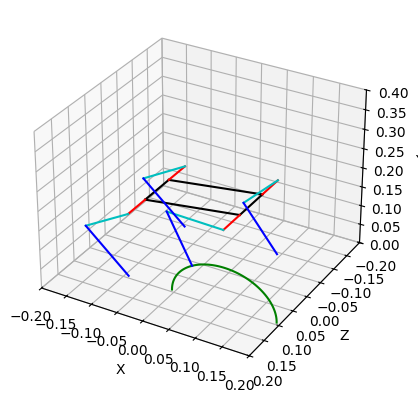

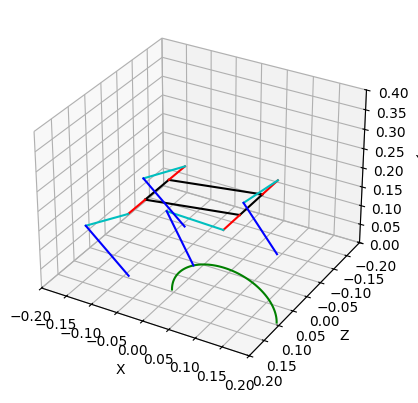

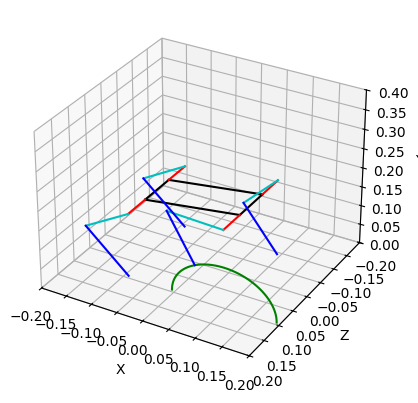

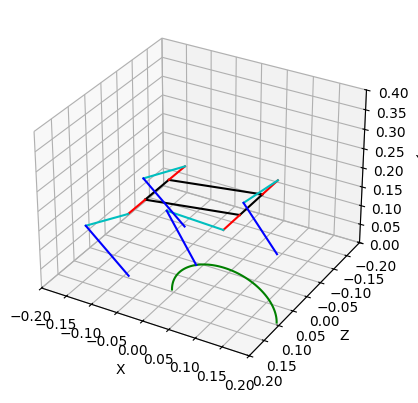

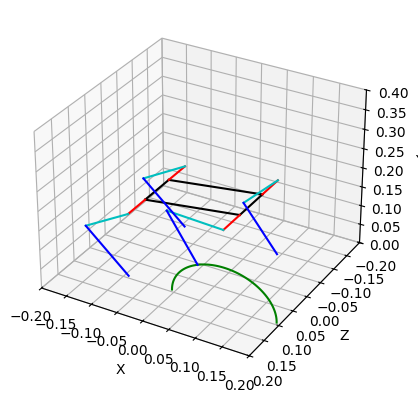

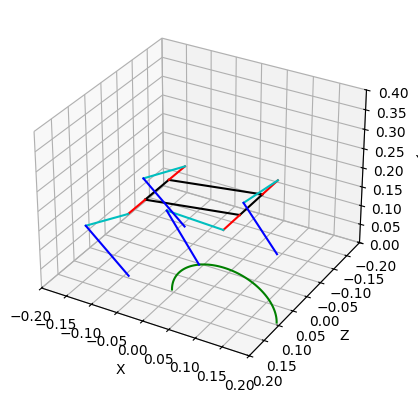

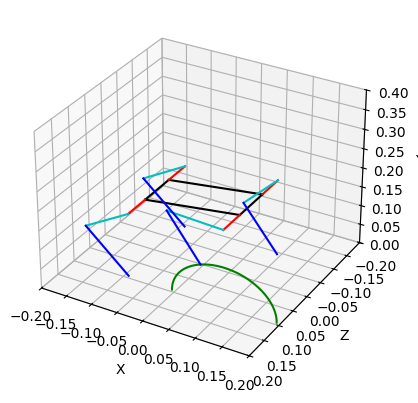

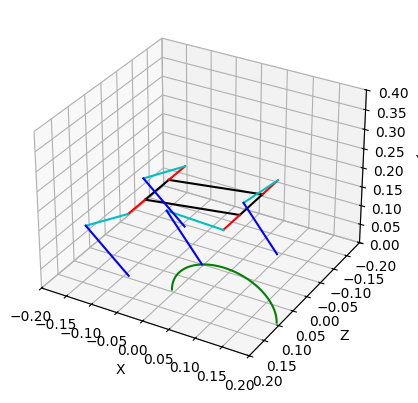

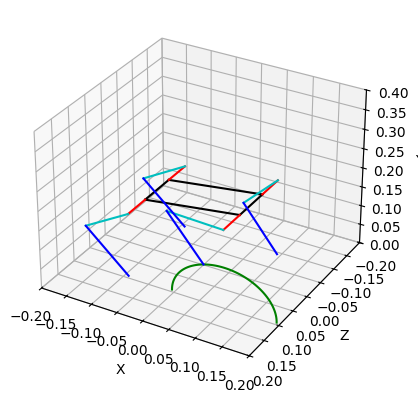

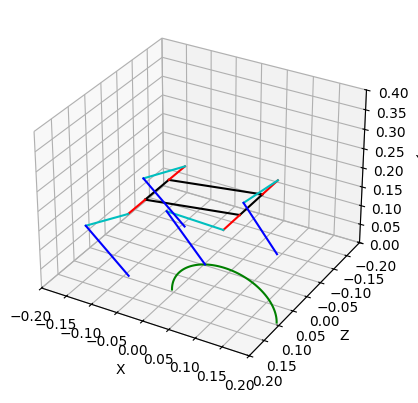

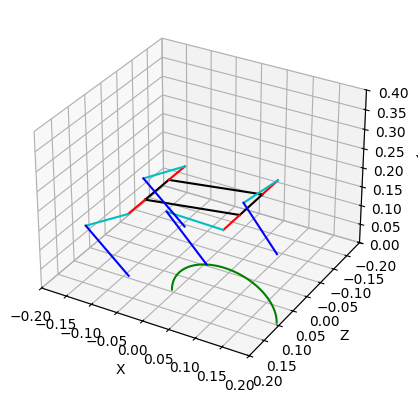

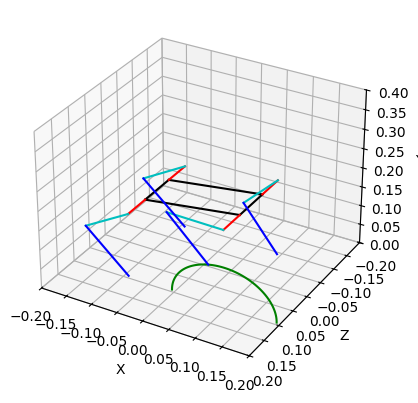

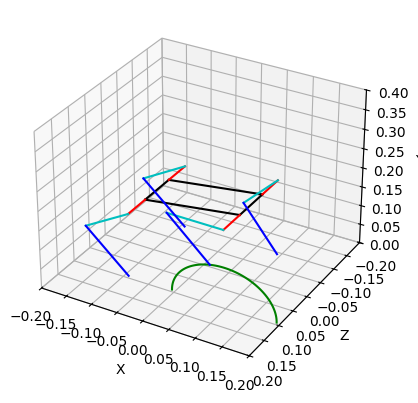

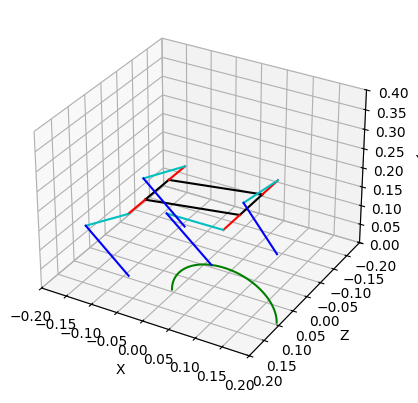

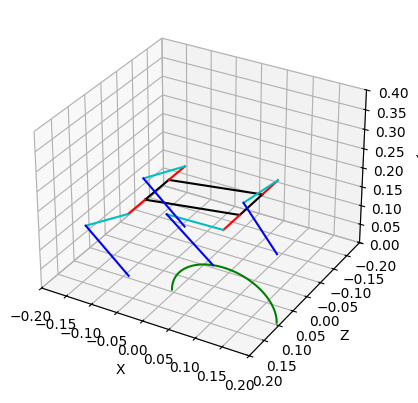

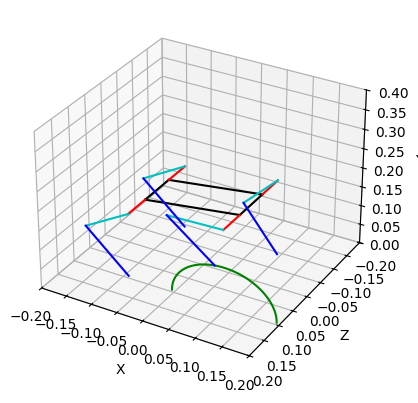

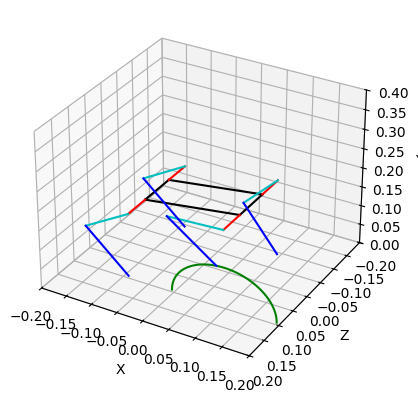

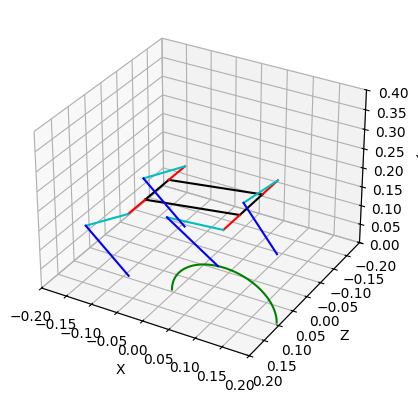

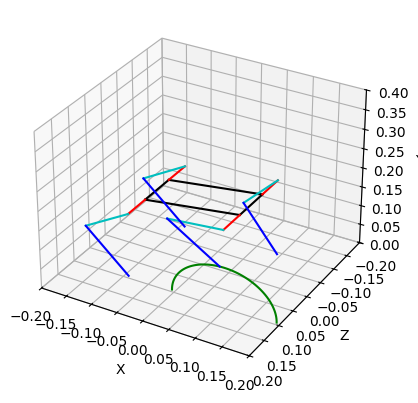

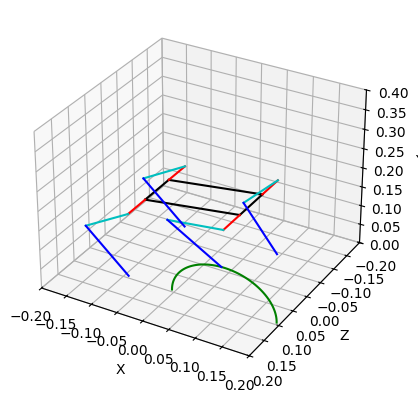

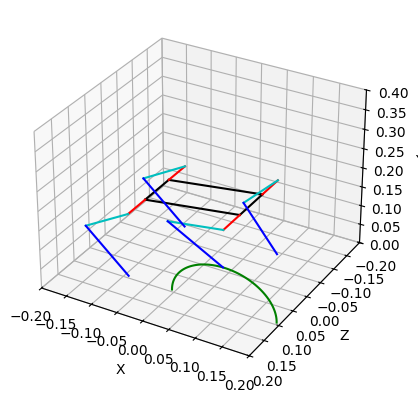

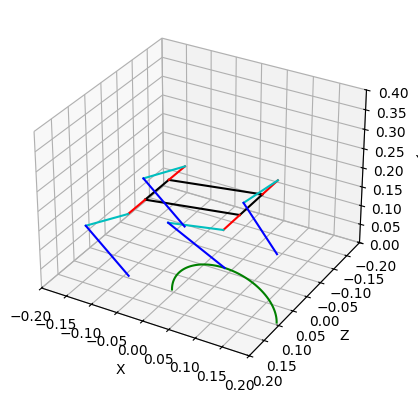

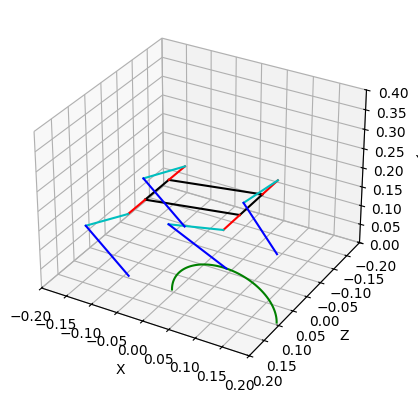

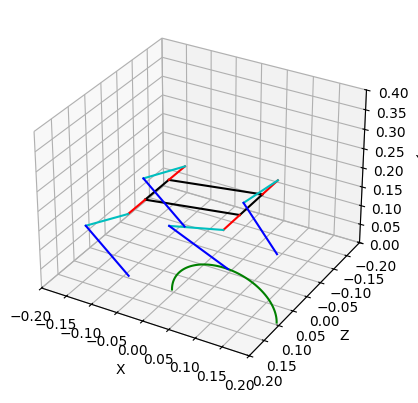

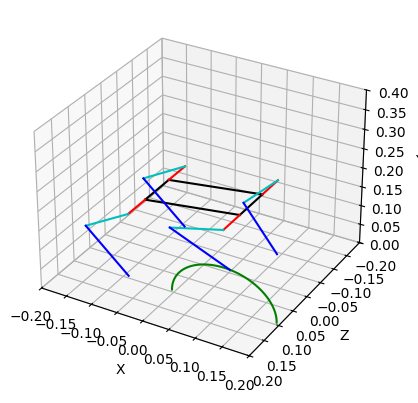

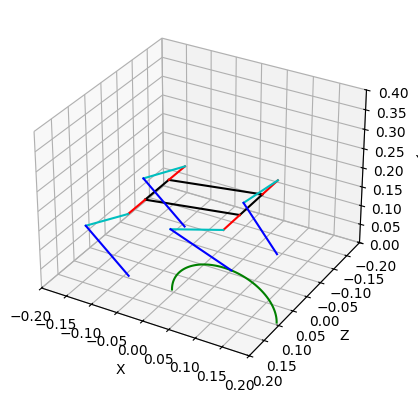

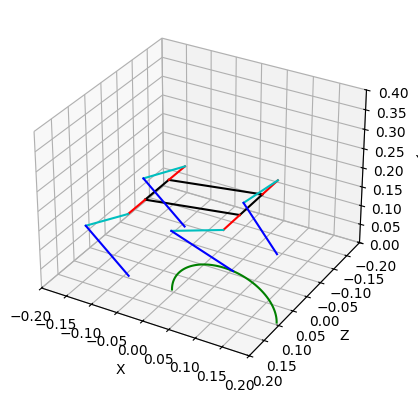

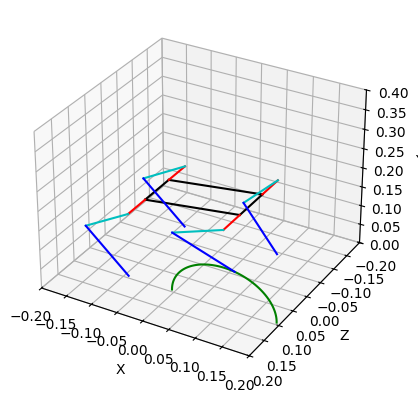

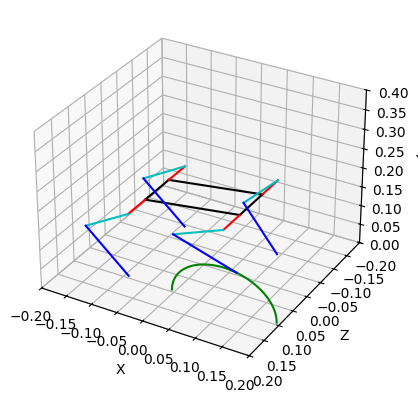

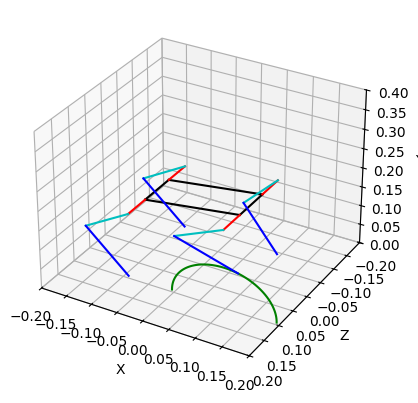

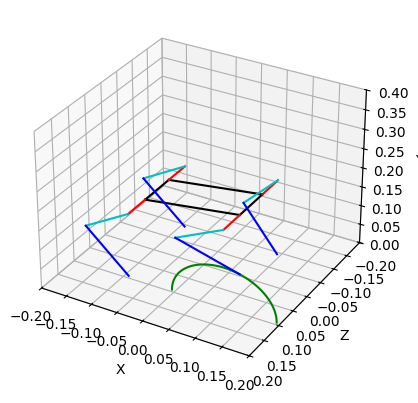

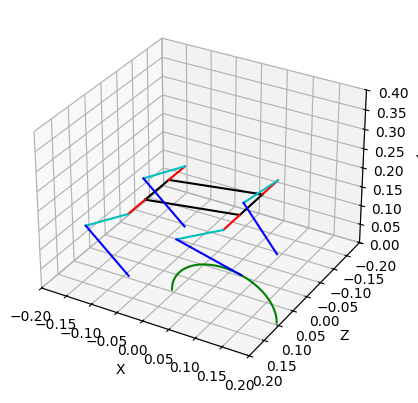

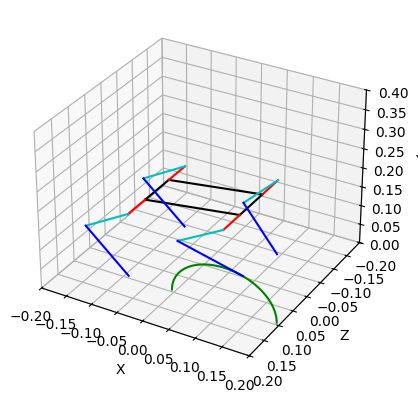

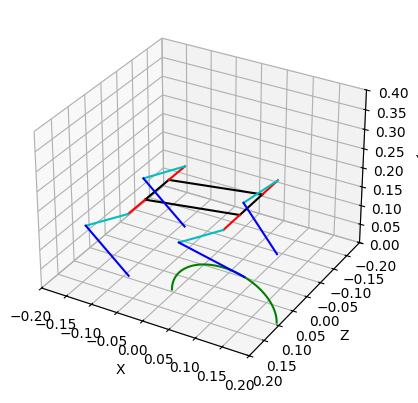

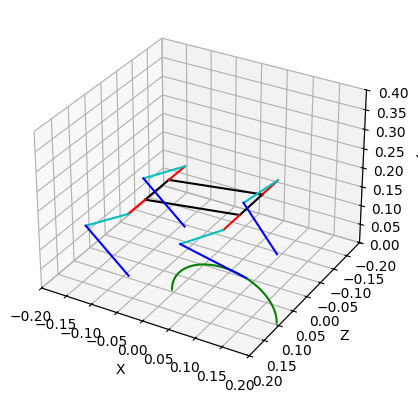

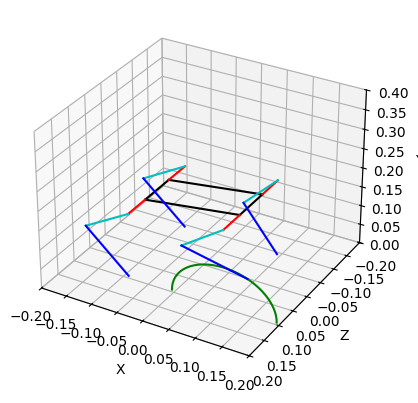

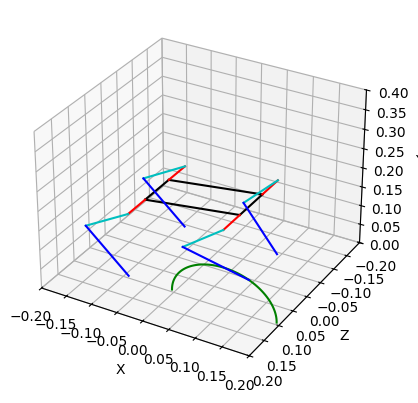

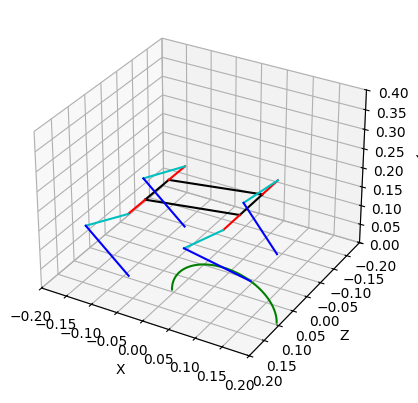

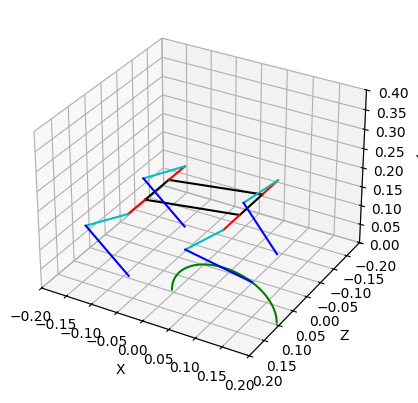

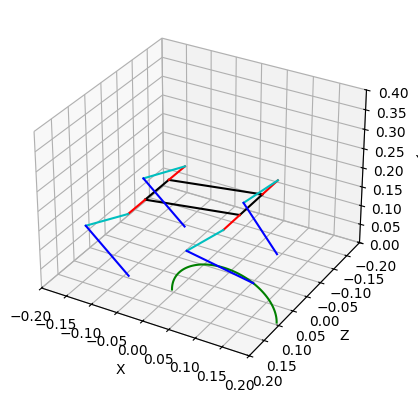

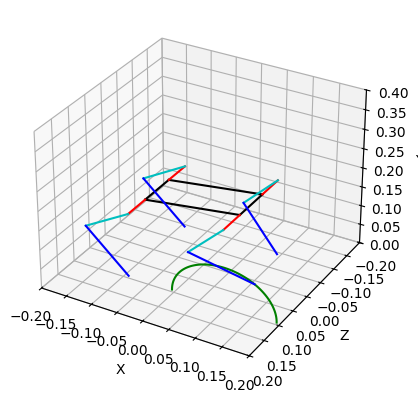

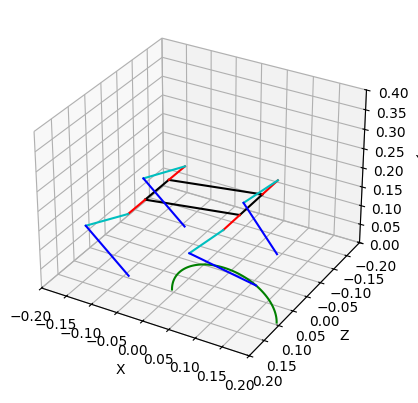

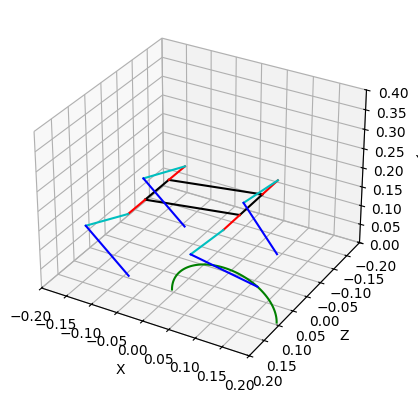

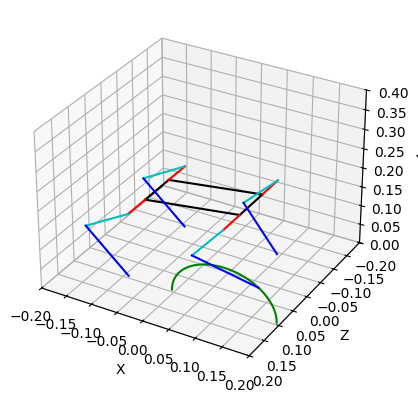

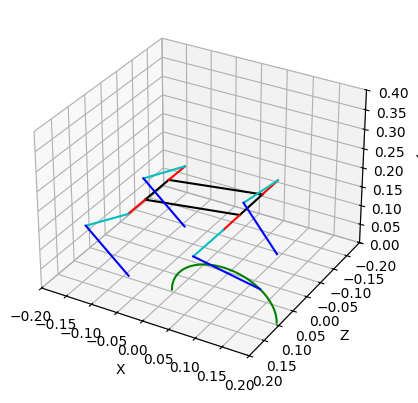

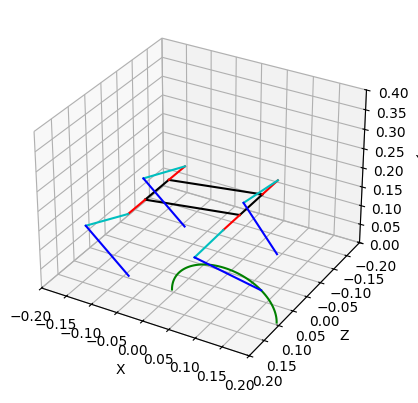

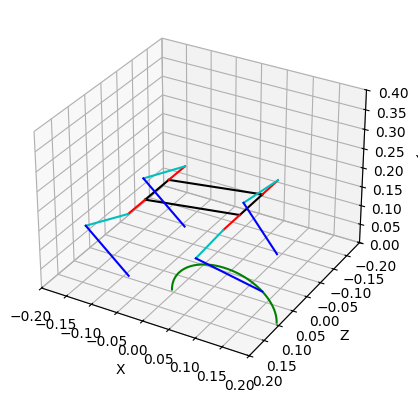

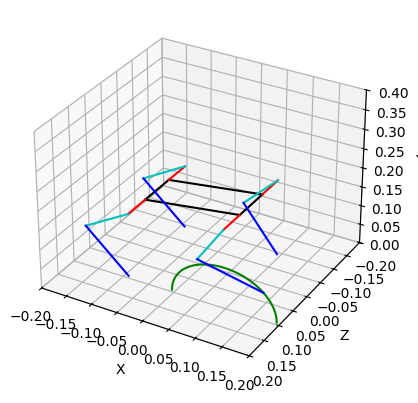

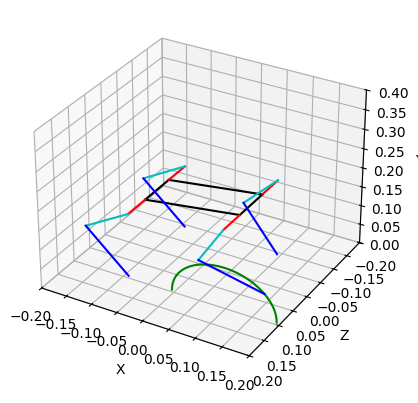

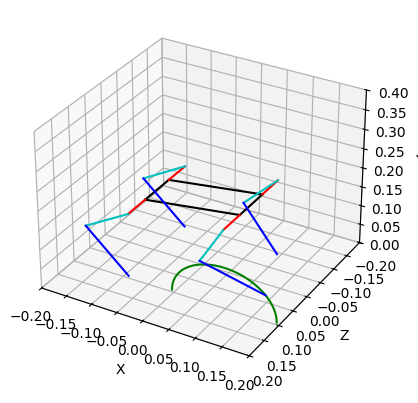

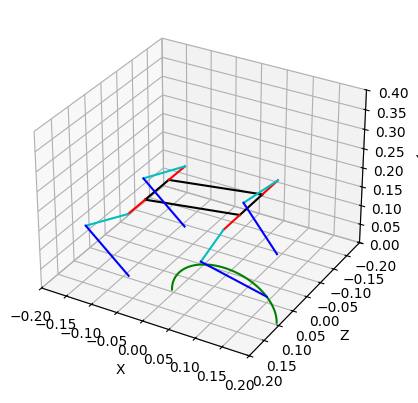

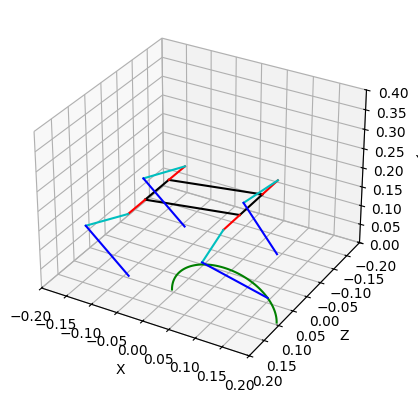

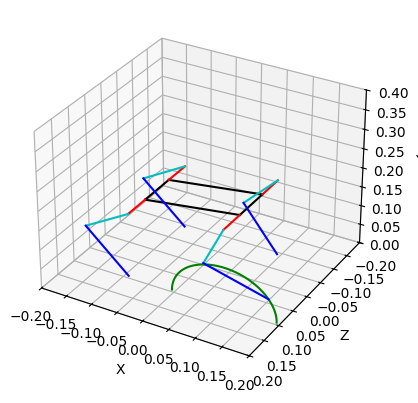

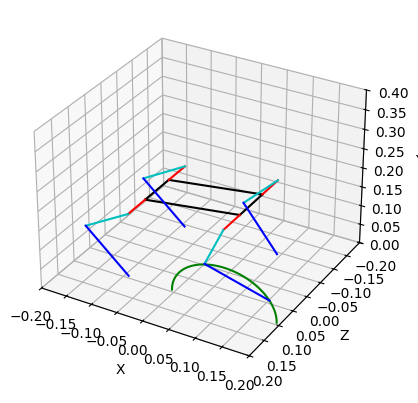

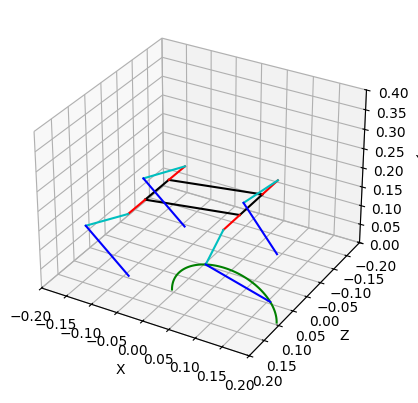

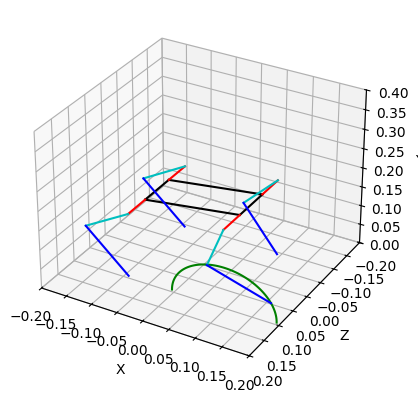

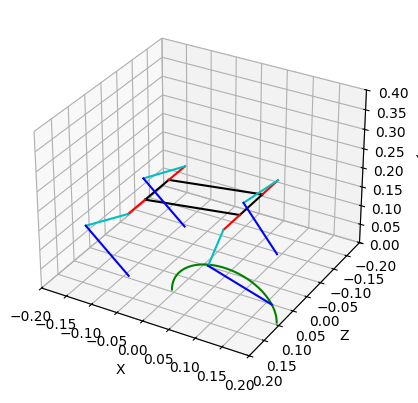

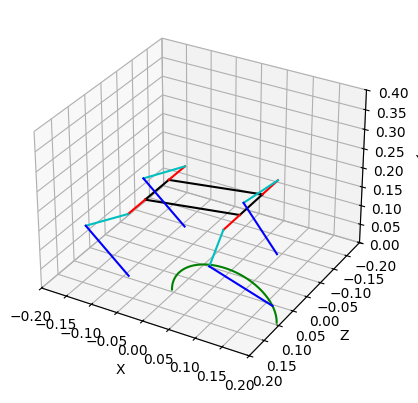

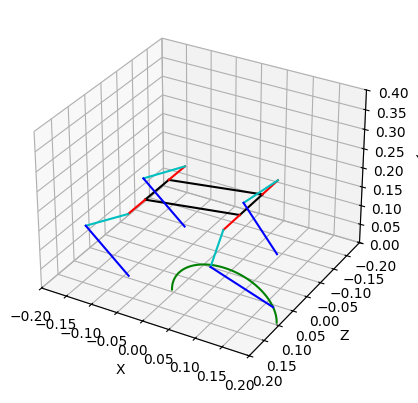

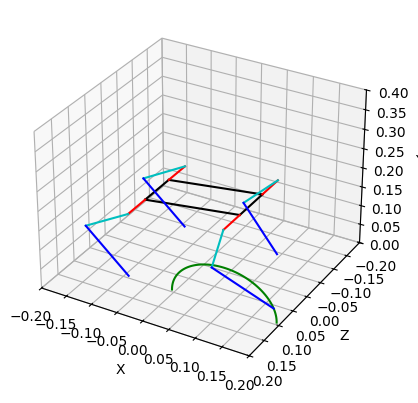

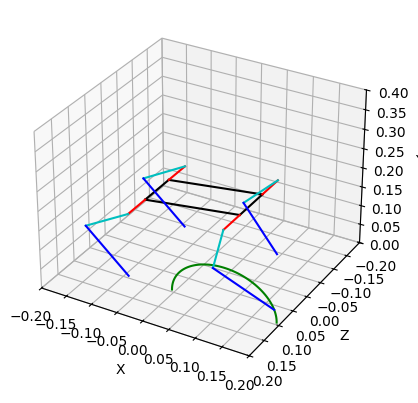

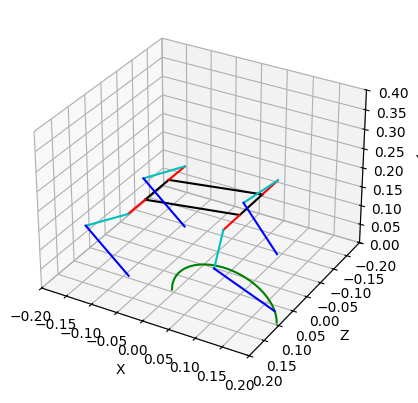

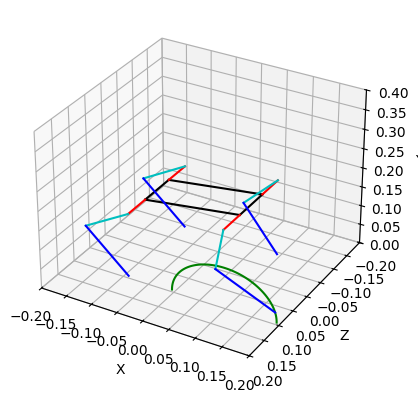

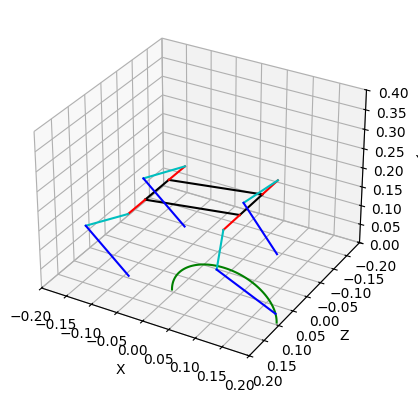

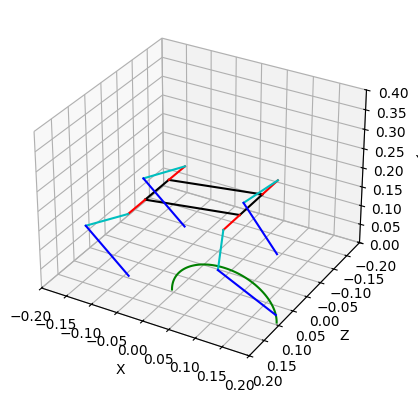

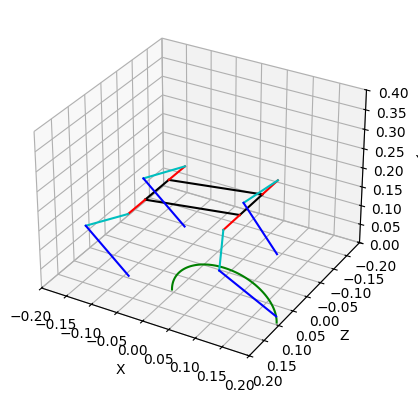

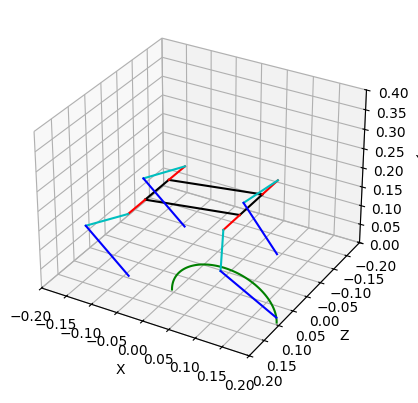

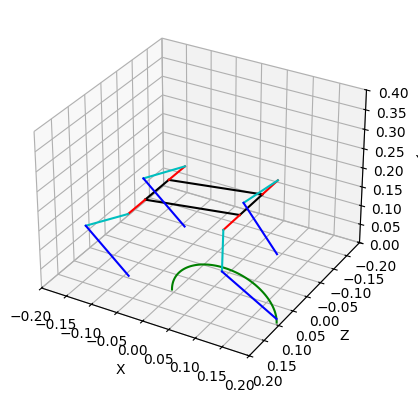

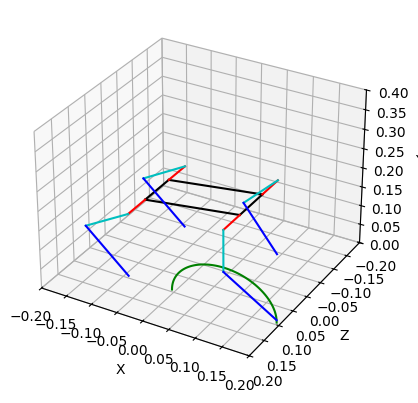

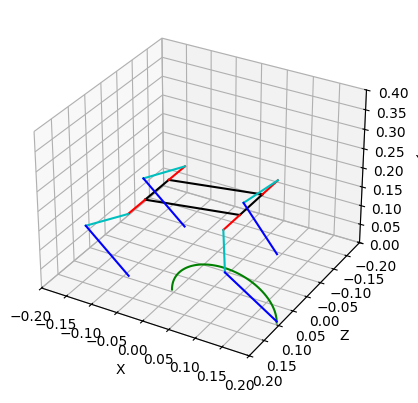

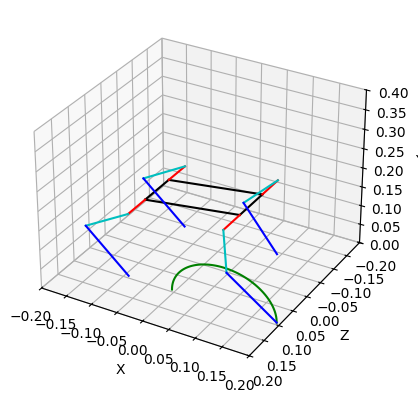

In [36]:
x__,y__,z__ = arch(samples=100)

for ind_movement, (x,y,z) in enumerate(zip(x__,y__,z__)):
    
    # Attaching 3D axis to the figure
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.set_xlabel('X')
    ax.set_ylabel('Z')
    ax.set_zlabel('Y')

    ax.set_xlim3d([-0.2, 0.2])
    ax.set_zlim3d([0, 0.4])
    ax.set_ylim3d([0.2,-0.2])

    # Instantiate spot micro stick figure obeject
    sm = SpotMicroStickFigure(x=0,y=0.18,z=0, theta=00*d2r)

    # Define absolute position for the legs
    l = sm.body_length
    w = sm.body_width
    l1 = sm.hip_length
    l2 = sm.upper_leg_length
    l3 = sm.lower_leg_length
    
    ax.plot(x__+l/2,y__+ w/2 + l1,z__,color='green')

    slack_movement = np.zeros((4,3))
    slack_movement[1] = [x,z,y]

    desired_p4_points = np.array([ [-l/2,   0,  w/2 + l1],
                                [ l/2 ,  0,  w/2 + l1],
                                [ l/2 ,  0, -w/2 - l1],
                                [-l/2 ,  0, -w/2 - l1] ])
    desired_p4_points += slack_movement

    
    
    sm.set_absolute_foot_coordinates(desired_p4_points)

    # Set a pitch angle
    sm.set_body_angles(theta=10*d2r)

    # Get leg coordinates
    coords = sm.get_leg_coordinates()

    # Initialize empty list top hold line objects
    lines = []

    # Construct the body of 4 lines from the first point of each leg (the four corners of the body)
    for i in range(4):
        # For last leg, connect back to first leg point
        if i == 3:
            ind = -1
        else:
            ind = i

        # Due to mplot3d rotation and view limitations, swap y and z to make the stick figure
        # appear oriented better
        x_vals = [coords[ind][0][0], coords[ind+1][0][0]]
        y_vals = [coords[ind][0][1], coords[ind+1][0][1]]
        z_vals = [coords[ind][0][2], coords[ind+1][0][2]]
        lines.append(ax.plot(x_vals,z_vals,y_vals,color='k')[0])

    # Plot color order for leg links: (hip, upper leg, lower leg)
    plt_colors = ['r','c','b']
    for leg in coords:
        for i in range(3):
            
            # Due to mplot3d rotation and view limitations, swap y and z to make the stick figure
            # appear oriented better
            x_vals = [leg[i][0], leg[i+1][0]]
            y_vals = [leg[i][1], leg[i+1][1]]
            z_vals = [leg[i][2], leg[i+1][2]]
            lines.append(ax.plot(x_vals,z_vals,y_vals,color=plt_colors[i])[0])

    
    # plt.show()
    plt.savefig(f"plots/image_{ind_movement:04d}.png")

body arch

In [ ]:
def body_arch(samples=100):
    # Parameters for the arch
    radius = 0.1         # Radius of the arch
    height = 0         # Maximum height of the arch
    theta_start = np.pi*0.5   # Starting angle in radians
    theta_end = np.pi*1.5  # Ending angle in radians (semi-circle)

    # Generate the theta values for the arch
    theta = np.linspace(theta_start, theta_end, samples)

    # Convert polar coordinates to Cartesian coordinates on the x-y plane
    x = radius * np.cos(theta)[::-1]
    y = height * np.sin(theta)[::-1]
    z = radius * np.sin(theta)[::-1]

    return x,y,z

In [ ]:
# Create a figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x,y,z = body_arch(samples=10)

# Draw the line
ax.plot(x, y, z, label='objective coords', color='green')


# Add labels
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('error plot')
ax.legend()

# Show the plot
plt.show()

In [ ]:
# x__,y__,z__ = body_arch(samples=10)

x__ = np.linspace(0,0.09,100)
y__ = np.linspace(0.05,0.18,100)
z__ = np.linspace(0,0,100)

for ind_movement, (x_,y_,z_) in enumerate(zip(x__,y__,z__)):
    
    # Attaching 3D axis to the figure
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.set_xlabel('X')
    ax.set_ylabel('Z')
    ax.set_zlabel('Y')

    ax.set_xlim3d([-0.2, 0.2])
    ax.set_zlim3d([0, 0.4])
    ax.set_ylim3d([0.2,-0.2])
    
    # ax.plot(x__,z__+0.18,y__,color='green')


    # Instantiate spot micro stick figure obeject
    sm = SpotMicroStickFigure(x=0,y=0.18,z=0, theta=00*d2r)

    # Define absolute position for the legs
    l = sm.body_length
    w = sm.body_width
    l1 = sm.hip_length
    l2 = sm.upper_leg_length
    l3 = sm.lower_leg_length

    phi = 0
    psi = 0
    theta = 0
    ht = np.matmul(transformations.homog_transxyz(x_,y_,z_), transformations.homog_rotxyz(phi,psi,theta))
    sm.set_absolute_body_pose(ht)

    # Set a pitch angle
    sm.set_body_angles(theta=10*d2r)

    # Get leg coordinates
    coords = sm.get_leg_coordinates()

    # Initialize empty list top hold line objects
    lines = []

    # Construct the body of 4 lines from the first point of each leg (the four corners of the body)
    for i in range(4):
        # For last leg, connect back to first leg point
        if i == 3:
            ind = -1
        else:
            ind = i

        # Due to mplot3d rotation and view limitations, swap y and z to make the stick figure
        # appear oriented better
        x_vals = [coords[ind][0][0], coords[ind+1][0][0]]
        y_vals = [coords[ind][0][1], coords[ind+1][0][1]]
        z_vals = [coords[ind][0][2], coords[ind+1][0][2]]
        lines.append(ax.plot(x_vals,z_vals,y_vals,color='k')[0])

    # Plot color order for leg links: (hip, upper leg, lower leg)
    plt_colors = ['r','c','b']
    for leg in coords:
        for i in range(3):
            
            # Due to mplot3d rotation and view limitations, swap y and z to make the stick figure
            # appear oriented better
            x_vals = [leg[i][0], leg[i+1][0]]
            y_vals = [leg[i][1], leg[i+1][1]]
            z_vals = [leg[i][2], leg[i+1][2]]
            lines.append(ax.plot(x_vals,z_vals,y_vals,color=plt_colors[i])[0])

    
    # plt.show()
    plt.savefig(f"plots/image_{ind_movement:04d}.png")